# IPN workshop on extracellular recordings

## Neuroseries and tuning curves

The goal of this jupyter notebook is to load the manually curated data after processing with kilosort.

In [1]:
import numpy as np
import pandas as pd
import neuroseries as nts
from pylab import *
from wrappers import *
from functions import *

path to the data and structure of the recording

In [2]:
data_directory = '/home/guillaume/Dropbox (Peyrache Lab)/SummerSchool/A2926-200311'

episodes = ['sleep', 'wake']
events = ['1']

load the spikes

In [5]:
spikes, shank = loadSpikeData(data_directory)
print(spikes.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85])


Load position

In [6]:
position = loadPosition(data_directory, events, episodes)

Load epochs time

In [12]:
wake_ep = loadEpoch(data_directory, 'wake', episodes)
sleep_ep = loadEpoch(data_directory, 'sleep')

print('Wake\n', wake_ep.as_units('s'))
print('Sleep\n', sleep_ep.as_units('s'))

Wake
        start     end
0  684.63235  1200.0
Sleep
    start    end
0    0.0  600.0


Compute angular tuning curves

In [18]:
tuning_curves = computeAngularTuningCurves(spikes, position['ry'], wake_ep, 60)
tuning_curves = smoothAngularTuningCurves(tuning_curves, 10, 2)

Plot the tuning curves

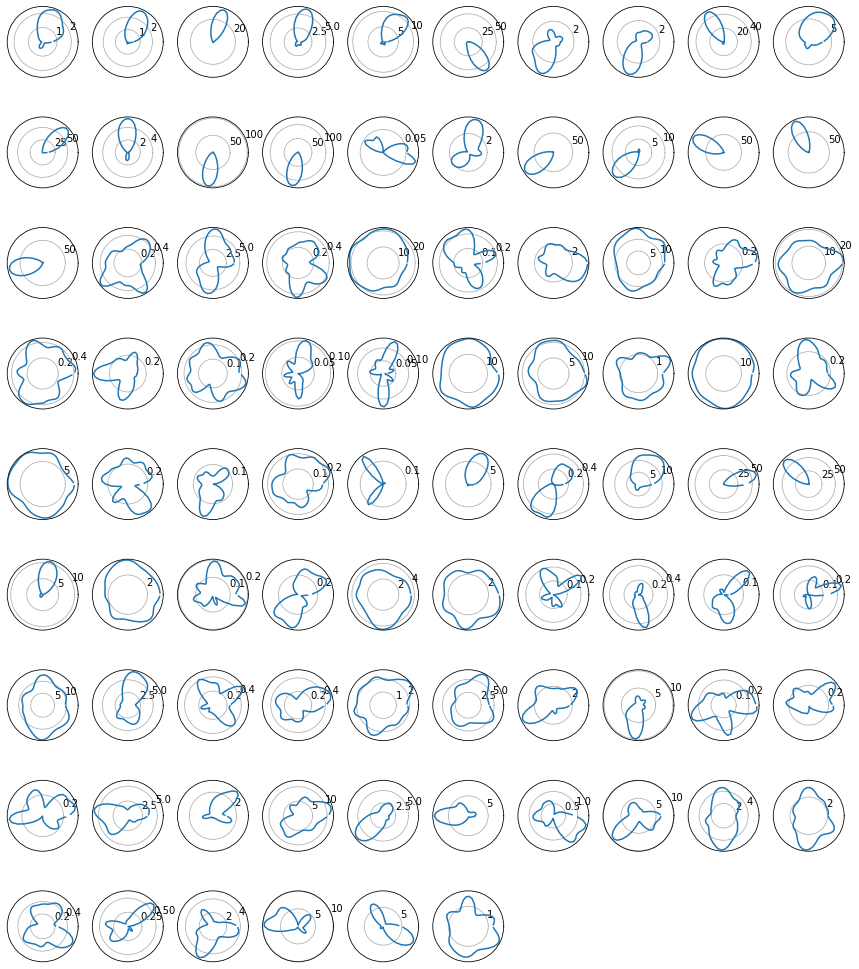

In [19]:
figure(figsize = (15, 20))
for i, n in enumerate(tuning_curves.columns):
    subplot(10,10,i+1, projection = 'polar')
    plot(tuning_curves[n])
    xticks([])
show()


Which neurons belongs to which shank

In [23]:
n_channels, fs, shank_to_channel = loadXML(data_directory)
print('Thalamus ', shank_to_channel[0])
print('CA1 ', shank_to_channel[1])

Thalamus  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
CA1  [25 26 27 28 29 30 31 32 33 34]


Plot the tuning curves of the thalamic neurons

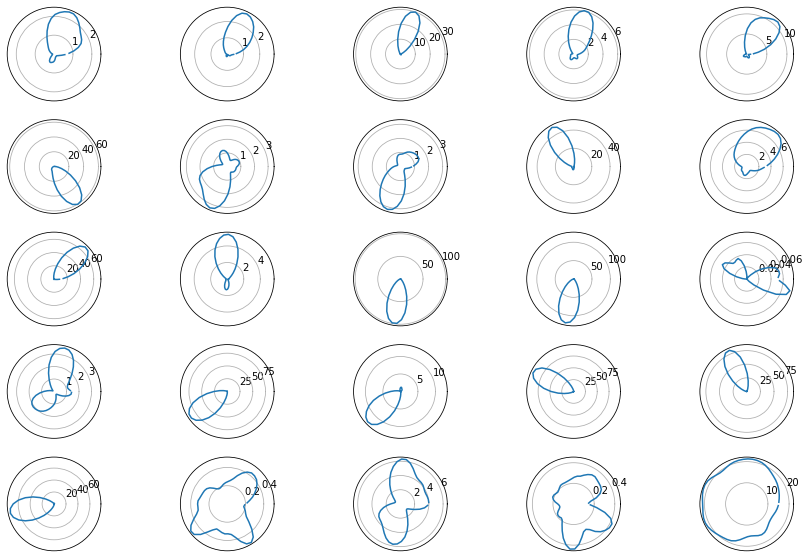

In [24]:
figure(figsize = (15, 10))
for i, n in enumerate(shank_to_channel[0]):
    subplot(5,5,i+1, projection = 'polar')
    plot(tuning_curves[n])
    xticks([])
show()


Plot the tuning curves of the hippocampal neurons

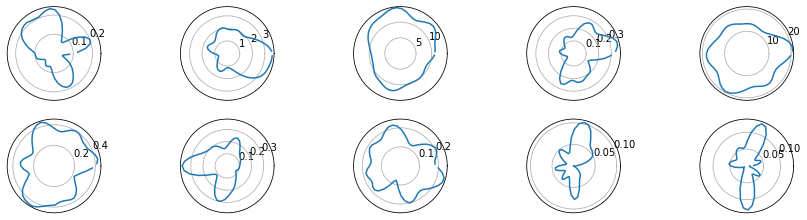

In [25]:
figure(figsize = (15, 10))
for i, n in enumerate(shank_to_channel[1]):
    subplot(5,5,i+1, projection = 'polar')
    plot(tuning_curves[n])
    xticks([])
show()


Question : why are the tuning curves of the CA1 neurons directionaly tuned?